# Лабораторная работа №3

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import pprint

# Задача 3.1
### N = 25; K = 1
Реализовать решение СЛАУ с помощью LU-разложения и LU-разложения по схеме частичного выбора. Решить систему небольшой размерности с возмущенной матрицей обоими методами, оценить погрешность и сравнить с теоретической оценкой. Проанализировать поведение методов с ростом числа уравнений.
1. Решение с помощью LU реализовано в виде двух функций, одна из которых возвращает две матрицы – L и U, не модифицируя A, а вторая функция решает систему;
2. Решение с помощью LU по схеме частичного выбора модифицирует исходную матрицу А.

$ A_{ij} = \sin^{20-j}{(i+1)} $ 


In [7]:
# Сперва зададим матрицу A и вектор b, чтобы с ними работать
A = np.array([
             [(np.sin(i+1))**(20-j) for j in range(5)] 
             for i in range(5)]
             )
x = np.array([25]*5)
b = np.dot(A, x)

In [8]:
# Функция LU-разложения матрицы A
def LU_decomp(A):
    # Создаем пустую матрицу LU-разложения
    L = np.zeros((A.shape[0], A.shape[1]))
    U = L.copy()
    n = A.shape[0]  
    # Получаем матрицу LU-разложения
    for k in range(n):
        # Верхнетреугольная матрица U
        for j in range(k, n):
            U[k, j] = A[k, j] - L[k, :k] @ U[:k, j] 
        # Нижнетреугольная матрица L 
        for i in range(k + 1, n):
            L[i, k] = (A[i, k] - L[i, :k] @ U[:k, k]) / U[k, k]        
    return L, U
 
# Решение с помощью LU-разложения
def LU_solve(A, b):   
    # Получаем матрицы L и U
    L, U = LU_decomp(A) 
    # Получаем вспомогательный вектор y
    y = np.zeros(L.shape[0])
    for i in range(y.shape[0]):
        y[i] = b[i] - L[i, :i] @ y[:i]    
    # Получаем вектор решения x
    x = np.zeros(U.shape[0])
    for i in range(1, x.shape[0] + 1):
        x[-i] = (y[-i] - U[-i, -i:] @ x[-i:]) / U[-i, -i]   
    return x

# LU по схеме частичного выбора (модификация исходной матрицы)
def LUp_solve(A, b):
    n = A.shape[0]
    A = A.astype(np.float64)
    piv = np.arange(0,n)
    for k in range(n-1):
        max_row_index = np.argmax(abs(A[k:n,k])) + k
        piv[[k,max_row_index]] = piv[[max_row_index,k]]
        A[[k,max_row_index]] = A[[max_row_index,k]]
        for i in range(k+1,n):          
            A[i,k] = A[i,k]/A[k,k]      
            for j in range(k+1,n):      
                A[i,j] -= A[i,k]*A[k,j] 
    b = b[piv]
    y = b.copy().astype(np.float64)
    for i in range(n): 
        for j in range(i):
            y[i] -= A[i,j]*y[j]   
    for i in range(A.shape[0]-1,-1,-1): 
        for j in range(i+1, A.shape[1]):
            y[i] -= A[i,j]*y[j]
        y[i] = y[i]/A[i,i]
    return y    

In [9]:
def delta_x(x1, x2):
    return linalg.norm(x2 - x1, ord = 2)/linalg.norm(x1, ord = 2)

def delta_x_score(A):
    return np.linalg.cond(A)*(1e-3)/linalg.norm(A, ord = 2)

In [10]:
L1, U1 = LU_decomp(A)
x1 = LU_solve(A, b)
x2 = LUp_solve(A, b)
print(x1)
print(x2)
print(linalg.solve(A, b))
print(x)

[25. 25. 25. 25. 25.]
[25. 25. 25. 25. 25.]
[25. 25. 25. 25. 25.]
[25 25 25 25 25]


In [11]:
# Число обусловленности матрицы A. 
print(np.linalg.cond(A))
# Оценка погрешности delta x
print(delta_x_score(A))
# Погрешность delta x
print(delta_x(x2, x))

152867560079500.94
144329331946.16266
2.832205875245817e-15


In [13]:
#Сюда будем записывать погрешности
delta_x1 = []
delta_x2 = []
delta_x3 = []
for n in range(5,16):
    A = np.array([
             [(np.sin(i+1))**(20-j) for j in range(n)] 
             for i in range(n)]
             )
    x = np.array([25]*n)
    b = np.dot(A, x)
    A1 = np.copy(A)
    A[0][0] += 1e-3 
    L, U = LU_decomp(A1)
    x1 = LU_solve(A1, b)
    x2 = LUp_solve(A1, b)
    x3 = linalg.solve(A1, b)
    delta_x1.append(delta_x(x1, x))
    delta_x2.append(delta_x(x2, x))
    delta_x3.append(delta_x(x3, x))
print(delta_x1)
print(delta_x2)
print(delta_x3)

[9.647464479684348e-14, 2.592975574923849e-13, 3.145308184115257e-13, 9.714126880081871e-12, 1.3852221564506703e-10, 1.6933166726789504e-10, 6.244965231066724e-08, 4.4678554205308755e-07, 1.6352736078935585e-06, 0.00028760742587390195, 0.004758836311949284]
[2.832205875245817e-15, 2.2618633742985743e-15, 2.1328932746645843e-14, 2.5307712438918106e-13, 1.094001298584268e-13, 5.700404103795635e-14, 8.972626697398103e-14, 3.15615698073974e-12, 8.173032393501149e-13, 1.6539258166663607e-10, 2.286126091421652e-10]
[5.8163901677683e-15, 4.1431405114489196e-16, 3.914715565118562e-15, 1.5417226045459725e-13, 3.346943742014146e-14, 5.346415534574516e-14, 1.9745667088328801e-13, 1.6565098238962675e-12, 3.3337008471371423e-12, 9.70810408412503e-11, 1.6513019832491817e-10]


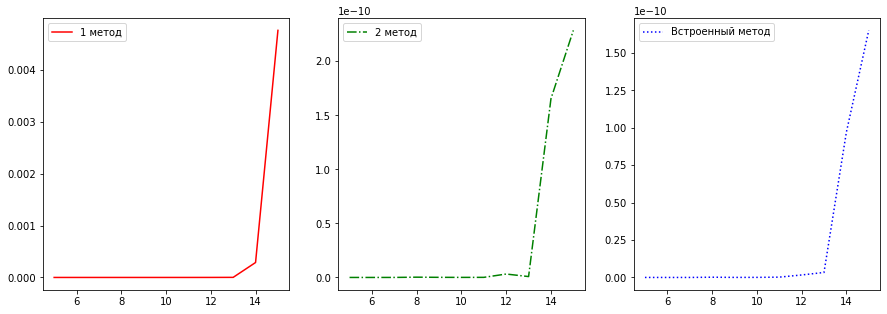

In [14]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
axs[0].plot(range(5,16), delta_x1, color = 'red', ls = 'solid', label = '1 метод')
axs[1].plot(range(5,16), delta_x2, color = 'green', ls = 'dashdot', label = '2 метод')
axs[2].plot(range(5,16), delta_x3, color = 'blue', ls = 'dotted', label = 'Встроенный метод')
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Задача 3.2
Дана система уравнений $Ax = b$ порядка $n$ с разреженной матрицей $A$. Решить систему прямым методом.

$ N = 25; n = 50; b_i = i^3e^{-i} $

Матрица $A$: на побочной диагонали элементы равны 100, на третьей и пятой наддиагоналях элементы равны 20.

In [100]:
A = np.zeros((50, 50))
for i in range(50):
    for j in range(50):
        if i == j - 3:
            A[i , j] = 20
        if i == j - 5:
            A[i, j] = 20
        if i == 49 - j:
            A[i, j] = 100
pprint.pprint(A)

array([[  0.,   0.,   0., ...,   0.,   0., 100.],
       [  0.,   0.,   0., ...,   0., 100.,   0.],
       [  0.,   0.,   0., ..., 100.,   0.,   0.],
       ...,
       [  0.,   0., 100., ...,   0.,   0.,   0.],
       [  0., 100.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.]])


To be continued...

# Задача 3.3
Решить задачу итерационным методом, указанным в индивидуальном варианте. Вектор правой части задается как $b = Ax$, где $x_i = N$.

Метод: минимальных невязок.

Элементы матрицы $A$ задаются формулой: $ A_{i,j} = \frac{cos(i + j)}{0.1  \beta} + 0.1\beta e^{-(i - j)^2} $, параметр $\beta$ задается формулой: $ \beta = (|66 - N| + 5)m $. Вектор $b$ задается по вектору решения.

Размерность матрицы: $ m = 26 $. Получаем $ \beta = (|66 - 25| + 5) * 26 = 1196 $

In [101]:
def MRM(A, b, eps):
    r = np.zeros(26)
    x = np.zeros(26)
    r = A @ x - b
    it = 0
    while linalg.norm(A @ x - b, ord = 2)/linalg.norm(b, ord = 2) >= eps:
        tau = np.sum((A @ r) * r)/np.sum((A @ r)*(A @ r))
        x = x - tau * r
        r = A @ x - b
        it += 1
    return x, it

In [102]:
A = np.array([
             [np.math.cos(i + j)/(0.1*1196) + 0.1*1196*np.math.exp(-(i - j)**2) for j in range(26)] 
             for i in range(26)]
             )
x = np.array([25]*26)
b = A @ x
x, it = MRM(A,b,10**(-14))
print(x)
print(it)

[25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25. 25.
 25. 25. 25. 25. 25. 25. 25. 25.]
72
